<a href="https://colab.research.google.com/github/ubsuny/MLFringe-Contrast-CP2P2024/blob/main/Intensity_cone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

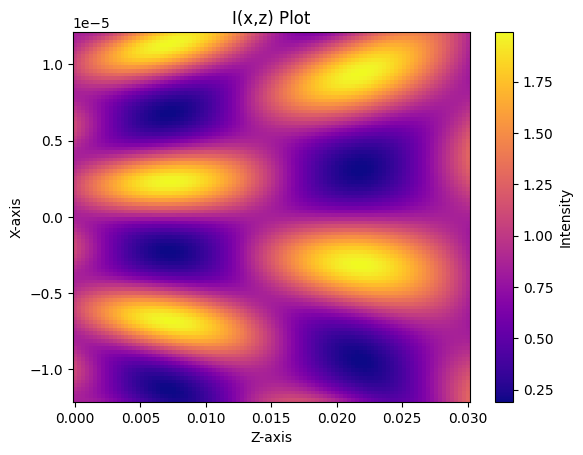

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
pi = np.pi
cos_term = np.cos(pi/8)
sin_term = np.sin(pi/8)
p_G = 2.4E-6
L_1 = 3
lam = 4E-10

# Constants (calculated from parameters)
k_G = 2*np.pi/p_G
K_0=2*np.pi/lam
x_1 = p_G/2

# Range for z and x
x_values = np.linspace(-5* p_G,  5* p_G, 100)  # Considering micrometers
z_values = np.linspace(0, 0.01*L_1, 100)   # Considering meters

# Initialize the intensity array
intensity_values = np.zeros((len(z_values), len(x_values)))

# Power factor to control the cone shape spread
power_factor = 30  # Experiment with different values

# Calculate the intensity for each combination of z and x
for i, z in enumerate(z_values):
    for j, x in enumerate(x_values):
        # Modify the x term and introduce a factor to spread the pattern in the y-axis
        x_term = x ** power_factor

        # Calculate the exponential terms within the summation
        exp_terms = sum(
            2/(pi*m) * np.exp((-1j * m * k_G )* x_1) *
            np.exp((-1j * m**2 * k_G**2 / (2 * K_0 * (1 + z / L_1))) * z) *
            np.exp((1j * m * k_G * power_factor / (1 + z / L_1/2))* x)
            for m in [-1,1]
        )
        # Calculate the intensity for the given z and x
        intensity_values[j, i] = np.abs(cos_term + sin_term * exp_terms)**2

# Create a 2D plot
plt.pcolormesh(z_values, x_values, intensity_values, cmap='plasma')
#plt.figure(dpi=100)
plt.xlabel('Z-axis')
plt.ylabel('X-axis')
#plt.yscale("log")
#plt.xscale("log")
#plt.xlim(0, 0.03)
#plt.ylim(0, 1E-5)
plt.title('I(x,z) Plot')
plt.colorbar(label='Intensity')
#plt.savefig('output_plot.png', dpi=1800)
plt.show()
